In [3]:
import pandas as pd
import numpy as np
import numpy_financial as npf
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")


from ggplot import *
from scipy.stats import logistic
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import *
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
import graphviz
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVC, SVR
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


from linearmodels.iv import IV2SLS
from scipy import stats
from scipy.stats import trim_mean #trimmed mean

import keyword

#open api 불러올 때 필요한 것
from urllib.request import urlopen #request package 설치
from bs4 import BeautifulSoup #bs4 package 설치

# 그래프에서 한글 깨지지 않기 위헤 사용함
from matplotlib import rcParams
from matplotlib import font_manager,rc

rcParams['axes.unicode_minus']=False
plt.rcParams['font.family']='Malgun Gothic'
font_name=font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font',family=font_name)

import plotly.graph_objects as go
import plotly.subplots as ms
import FinanceDataReader as fdr

In [4]:
df=fdr.DataReader('005930','2022-01-01')
df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-01-03,79400,79800,78200,78600,13502112,0.003831
2022-01-04,78800,79200,78300,78700,12427416,0.001272
2022-01-05,78800,79000,76400,77400,25470640,-0.016518
2022-01-06,76700,77600,76600,76900,12931954,-0.006460
2022-01-07,78100,78400,77400,78300,15163757,0.018205


In [6]:
volume_bar=go.Bar(x=df.index,y=df['Volume']) # 막대그래프 정의
fig=go.Figure(data=volume_bar) # 그래프 보기
fig.show()

In [7]:
# 강의안 보고 직접 해보세요
# 새로운 강의안 보기

## 5 관심있는 주가 데이터 입수 및 이동 평균선 그리기

In [8]:
df=fdr.DataReader('000660','2022-01-01')
df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-01-03,132000,132500,128000,128500,3782213,-0.019084
2022-01-04,129500,130000,127500,128500,3622369,0.000000
2022-01-05,129000,129000,121500,125500,7414954,-0.023346
2022-01-06,123500,127000,123000,125000,3725569,-0.003984
2022-01-07,127000,129000,126500,127000,3270119,0.016000


In [9]:
df.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2024-04-02,188000,190000,184400,186300,4207759,0.004313
2024-04-03,182000,183700,178200,179200,5416518,-0.038111
2024-04-04,184400,188500,184000,188000,5344102,0.049107
2024-04-05,184800,187600,181800,182800,4043133,-0.027660
2024-04-08,183900,183900,180000,180300,1844059,-0.013676


<function matplotlib.pyplot.show(close=None, block=None)>

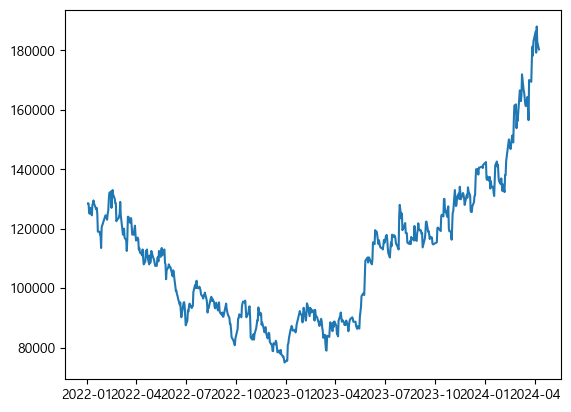

In [11]:
# Q4 
plt.plot(df['Close'])
plt.show

In [12]:
# Q6 이동평균선 moving - average trend 설명은 필참
# 3day - MA
df['MA3']=df['Close'].rolling(window=3).mean()
df.head()

,Open,High,Low,Close,Volume,Change,MA3
Date,,,,,,,
2022-01-03,132000,132500,128000,128500,3782213,-0.019084,NaN
2022-01-04,129500,130000,127500,128500,3622369,0.000000,NaN
2022-01-05,129000,129000,121500,125500,7414954,-0.023346,127500.000000
2022-01-06,123500,127000,123000,125000,3725569,-0.003984,126333.333333
2022-01-07,127000,129000,126500,127000,3270119,0.016000,125833.333333


In [13]:
# 2022-01-03, 04는 과거 3일치가 없어서 값(MA3)이 안나옴 <- 결측치

In [14]:
# 10day - MA
df['MA10']=df['Close'].rolling(window=10).mean()
df['MA20']=df['Close'].rolling(window=20).mean()
df['MA100']=df['Close'].rolling(window=100).mean()
df.tail()

,Open,High,Low,Close,Volume,Change,MA3,MA10,MA20,MA100
Date,,,,,,,,,,
2024-04-02,188000,190000,184400,186300,4207759,0.004313,184933.333333,175650.0,169985.0,144647.0
2024-04-03,182000,183700,178200,179200,5416518,-0.038111,183666.666667,177920.0,170800.0,145135.0
2024-04-04,184400,188500,184000,188000,5344102,0.049107,184500.000000,179720.0,171955.0,145739.0
2024-04-05,184800,187600,181800,182800,4043133,-0.027660,183333.333333,181020.0,172500.0,146287.0
2024-04-08,183900,183900,180000,180300,1844059,-0.013676,183700.000000,182110.0,173185.0,146785.0


<function matplotlib.pyplot.show(close=None, block=None)>

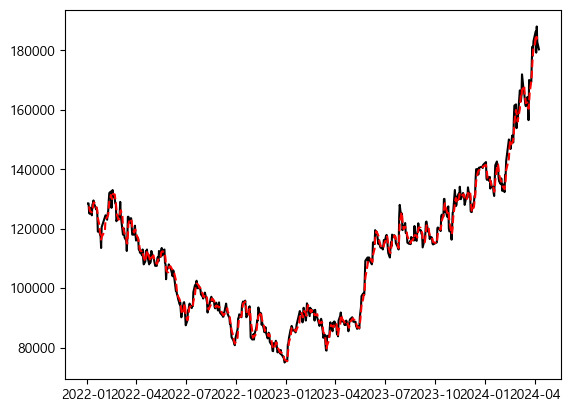

In [15]:
# MA 값을 그래프로 표현해보자 -> short term, long term 추세 알 수 있다
# plt.plot을 반복해서 쓰면 된다

plt.plot(df['Close'],color='black')
plt.plot(df['MA3'],color='red',linestyle='--')
plt.show

In [16]:
# 두개 차이는 크게 없음
#기간짧을 수록 원 데이터랑 비스하니까

<function matplotlib.pyplot.show(close=None, block=None)>

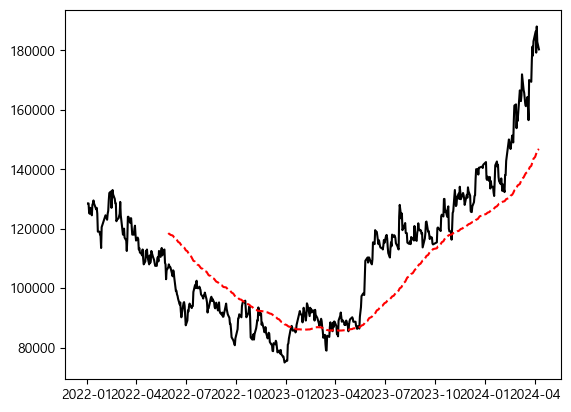

In [18]:
plt.plot(df['Close'],color='black')
plt.plot(df['MA100'],color='red',linestyle='--')
plt.show

In [19]:
# long term trend보다는 최근 가격이 더 많이 상승하고 있다

<function matplotlib.pyplot.show(close=None, block=None)>

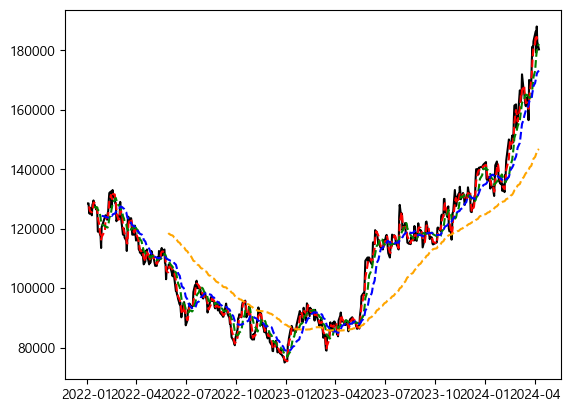

In [20]:
plt.plot(df['Close'],color='black')
plt.plot(df['MA3'],color='red',linestyle='--')
plt.plot(df['MA10'],color='green',linestyle='--')
plt.plot(df['MA20'],color='blue',linestyle='--')
plt.plot(df['MA100'],color='orange',linestyle='--')
plt.show

- moving agerage 길어지는 것의 의미?
- 중간 정도는 실제 데이터와 long term 의 중간정도로 smoothing 한게 나온다
- 이런거 시험 에 낸다
- moving average 해석!!!!
- 방향성, 추세 파악에 사용됨
- 상승/하락 추세
- 단기 , 장기 이동선
- 단기 이동선이 장기 이동서선 크로스 해서 더 위에 있다 -> 장기적인 상향선을 단깆거으로 돌파 하고 있다! -> 지금 매수해야 함 지금 더 과열되어 있으니까.. 
- 100일 짜리 long term trend = 지지선
- 지지선: 더 이상 이 아래로는 떨어지지 않을 것으로 예상되는 선
- 지지선 보다 더 아래로 가격ㅇ ㅣ떨어지면? 그 기간에는 -> 새로운 추세가 단기적으로 발생하고 있는 것


# LN6 : 주가수익률 분포(1)


## 1 이항 분포

- 이론 부분 다시 듣기



In [21]:
# 파이썬으로 이산확률변수 값 계산하기

# Q1 주사위 5번 던져서 1이 2번 나올 확률 계산하라
# 5C2*(1/6)^2*(5/6)^3

import math #을 사용해서 조합 계산

In [22]:
comb1=math.comb(5,2)
comb1

10

In [23]:
# Pr(X=2)
comb1*((1/6)**2)*((5/6)**3)

0.1607510288065844